In [206]:
import pandas as pd
import numpy as np
df = pd.read_csv('ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [207]:
df = df.drop('timestamp', axis=1)
df.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


In [208]:
matrix = pd.pivot_table(df, values='rating', index='userId', columns='movieId')


In [209]:
## cria a matriz B
b = matrix.copy()


In [210]:
## substitui um elemento aleatório que não seja NAN da matriz B por um valor aleatorio de 0 a 5.
i = np.random.randint(0, b.shape[0])
j = np.random.randint(0, b.shape[1])
while np.isnan(b.iloc[i, j]):
    i = np.random.randint(0, b.shape[0])
    j = np.random.randint(0, b.shape[1])
print(i, j)
print(b.iloc[i, j])
b.iloc[i, j] = np.random.randint(0, 51)/10
print(b.iloc[i, j])

517 1647
4.0
4.8


In [211]:
## substitui os NANs da matriz B por 2.5
b = b.fillna(2.5)

In [212]:
b = b.to_numpy()

In [213]:
def selecionar_K_primeiros_valores (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,0:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

In [214]:
from scipy.linalg import svd, diagsvd

## calcula a SVD da matriz B
U, s, Vt = svd(b)


In [215]:
print(U.shape)
print(s.shape)
print(Vt.shape)

(671, 671)
(671,)
(9066, 9066)


In [216]:
import matplotlib.pyplot as plt


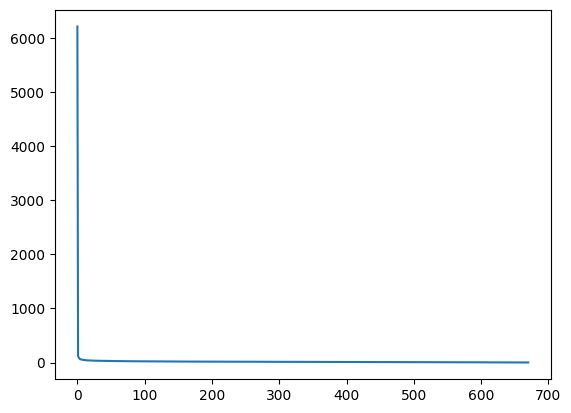

In [217]:
plt.plot(s)
plt.show()

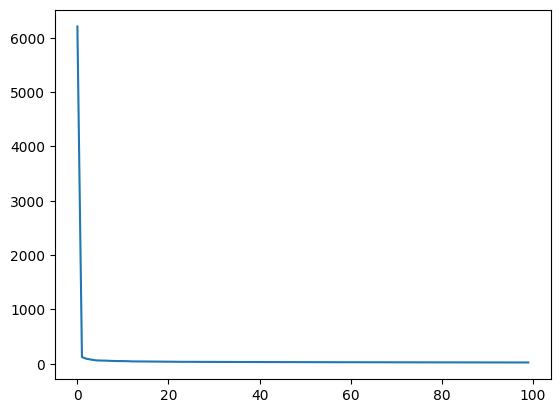

In [218]:
plt.plot(s[:100])
plt.show()

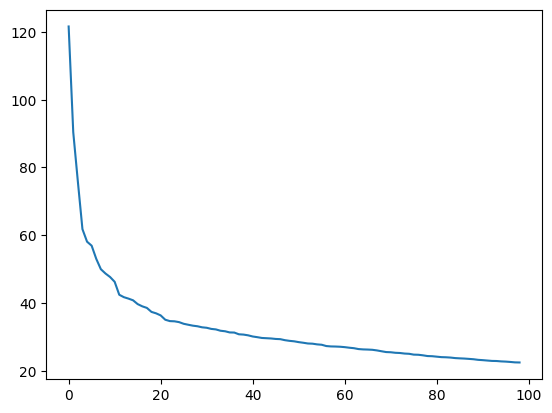

In [219]:
## plot the s values
plt.plot(s[1:100])
plt.show()

In [220]:
#retira os K ultimos valores das matrizes U, s e Vt

U_, s_, Vt_ = selecionar_K_primeiros_valores(U, s, Vt, 60)

In [221]:
## reconstrói a matriz B com a retirada do ruido a partir da SVD
B_ = U_ @ diagsvd(s_, U_.shape[1], Vt_.shape[0]) @ Vt_

## compara o valor da matriz original, da matriz B e da matriz B_ (com ruido retirado)
print(matrix.iloc[i, j])
print(b[i, j])
print(B_[i, j])


4.0
4.8
4.936071204211491
